# Data Exploration

In this notebook, we will explore the CUAD dataset to understand its structure, visualize data distributions, and prepare for further analysis.

In [1]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns
import json
import numpy as np
from collections import Counter

# Set visualization style
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

In [2]:
figure_dir = '../figures'

# Create figures directory if it doesn't exist
os.makedirs(figure_dir, exist_ok=True)

print("Figures directory created successfully!")

Figures directory created successfully!


In [3]:
# Load the CUAD dataset from JSON
data_path = '../data/raw/CUAD_v1/CUAD_v1.json'

with open(data_path, 'r', encoding='utf-8') as f:
    cuad_data = json.load(f)

print(f"Dataset structure: {cuad_data.keys()}")
print(f"Version: {cuad_data.get('version', 'Not specified')}")
print(f"Number of documents: {len(cuad_data['data'])}")


Dataset structure: dict_keys(['version', 'data'])
Version: aok_v1.0
Number of documents: 510


In [4]:

# Parse the CUAD data into a more workable format
def parse_cuad_data(cuad_data):
    """
    Parse CUAD JSON data into a structured DataFrame
    """
    rows = []
    
    for doc in cuad_data['data']:
        doc_title = doc['title']
        
        for paragraph in doc['paragraphs']:
            context = paragraph['context']
            
            for qa in paragraph['qas']:
                question = qa['question']  # This is the clause type
                question_id = qa['id']
                is_impossible = qa['is_impossible']
                
                # Extract answers (clause spans)
                answers = []
                if not is_impossible and 'answers' in qa:
                    for answer in qa['answers']:
                        answers.append({
                            'text': answer['text'],
                            'answer_start': answer['answer_start']
                        })
                
                rows.append({
                    'document_title': doc_title,
                    'question_id': question_id,
                    'clause_type': question,
                    'context': context,
                    'has_clause': not is_impossible,
                    'answers': answers,
                    'num_answers': len(answers) if answers else 0,
                    'context_length': len(context)
                })
    
    return pd.DataFrame(rows)

# Parse the data
df = parse_cuad_data(cuad_data)
print(f"Total rows: {len(df)}")
print(f"Columns: {list(df.columns)}")
df.head(30)


Total rows: 20910
Columns: ['document_title', 'question_id', 'clause_type', 'context', 'has_clause', 'answers', 'num_answers', 'context_length']


,document_title,question_id,clause_type,context,has_clause,answers,num_answers,context_length
0,LIMEENERGYCO_09_09_1999-EX-10-DISTRIBUTOR AGRE...,LIMEENERGYCO_09_09_1999-EX-10-DISTRIBUTOR AGRE...,Highlight the parts (if any) of this contract ...,EXHIBIT 10.6\n\n ...,True,"[{'text': 'DISTRIBUTOR AGREEMENT', 'answer_sta...",1,54290
1,LIMEENERGYCO_09_09_1999-EX-10-DISTRIBUTOR AGRE...,LIMEENERGYCO_09_09_1999-EX-10-DISTRIBUTOR AGRE...,Highlight the parts (if any) of this contract ...,EXHIBIT 10.6\n\n ...,True,"[{'text': 'Distributor', 'answer_start': 244},...",5,54290
2,LIMEENERGYCO_09_09_1999-EX-10-DISTRIBUTOR AGRE...,LIMEENERGYCO_09_09_1999-EX-10-DISTRIBUTOR AGRE...,Highlight the parts (if any) of this contract ...,EXHIBIT 10.6\n\n ...,True,"[{'text': '7th day of September, 1999.', 'answ...",1,54290
3,LIMEENERGYCO_09_09_1999-EX-10-DISTRIBUTOR AGRE...,LIMEENERGYCO_09_09_1999-EX-10-DISTRIBUTOR AGRE...,Highlight the parts (if any) of this contract ...,EXHIBIT 10.6\n\n ...,True,[{'text': 'The term of this Agreement shall ...,2,54290
4,LIMEENERGYCO_09_09_1999-EX-10-DISTRIBUTOR AGRE...,LIMEENERGYCO_09_09_1999-EX-10-DISTRIBUTOR AGRE...,Highlight the parts (if any) of this contract ...,EXHIBIT 10.6\n\n ...,True,[{'text': 'The term of this Agreement shall ...,1,54290
5,LIMEENERGYCO_09_09_1999-EX-10-DISTRIBUTOR AGRE...,LIMEENERGYCO_09_09_1999-EX-10-DISTRIBUTOR AGRE...,Highlight the parts (if any) of this contract ...,EXHIBIT 10.6\n\n ...,True,[{'text': 'If Distributor ...,1,54290
6,LIMEENERGYCO_09_09_1999-EX-10-DISTRIBUTOR AGRE...,LIMEENERGYCO_09_09_1999-EX-10-DISTRIBUTOR AGRE...,Highlight the parts (if any) of this contract ...,EXHIBIT 10.6\n\n ...,False,[],0,54290
7,LIMEENERGYCO_09_09_1999-EX-10-DISTRIBUTOR AGRE...,LIMEENERGYCO_09_09_1999-EX-10-DISTRIBUTOR AGRE...,Highlight the parts (if any) of this contract ...,EXHIBIT 10.6\n\n ...,True,[{'text': 'This Agreement is to be construed a...,1,54290
8,LIMEENERGYCO_09_09_1999-EX-10-DISTRIBUTOR AGRE...,LIMEENERGYCO_09_09_1999-EX-10-DISTRIBUTOR AGRE...,Highlight the parts (if any) of this contract ...,EXHIBIT 10.6\n\n ...,False,[],0,54290
9,LIMEENERGYCO_09_09_1999-EX-10-DISTRIBUTOR AGRE...,LIMEENERGYCO_09_09_1999-EX-10-DISTRIBUTOR AGRE...,Highlight the parts (if any) of this contract ...,EXHIBIT 10.6\n\n ...,False,[],0,54290


In [5]:
def extract_clause_name(clause_type):
    """Extract the actual clause name from the verbose CUAD question format"""
    # Look for text between quotes after "related to"
    match = re.search(r'related to "([^"]*)"', clause_type)
    if match:
        return match.group(1)
    else:
        # Fallback: try to extract from the question format
        if 'related to' in clause_type:
            parts = clause_type.split('related to')[1].split('that should be reviewed')[0]
            return parts.strip(' "')
        return clause_type

In [6]:
clean_clause_names = df['clause_type'].apply(extract_clause_name)
df['clean_clause_name'] = clean_clause_names

In [7]:

# Basic dataset statistics
print("=== CUAD Dataset Overview ===")
print(f"Total questions/clause types: {df['clause_type'].nunique()}")
print(f"Total documents: {df['document_title'].nunique()}")
print(f"Total contexts/paragraphs: {len(df)}")
print(f"Questions with clauses present: {df['has_clause'].sum()}")
print(f"Questions with no clauses: {(~df['has_clause']).sum()}")
print(f"Percentage with clauses: {df['has_clause'].mean():.2%}")


=== CUAD Dataset Overview ===
Total questions/clause types: 41
Total documents: 510
Total contexts/paragraphs: 20910
Questions with clauses present: 6702
Questions with no clauses: 14208
Percentage with clauses: 32.05%


C:\Users\pgabriel\AppData\Local\Temp\ipykernel_38532\3875330691.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=clause_presence_counts.values, y=truncated_labels, ax=ax1,


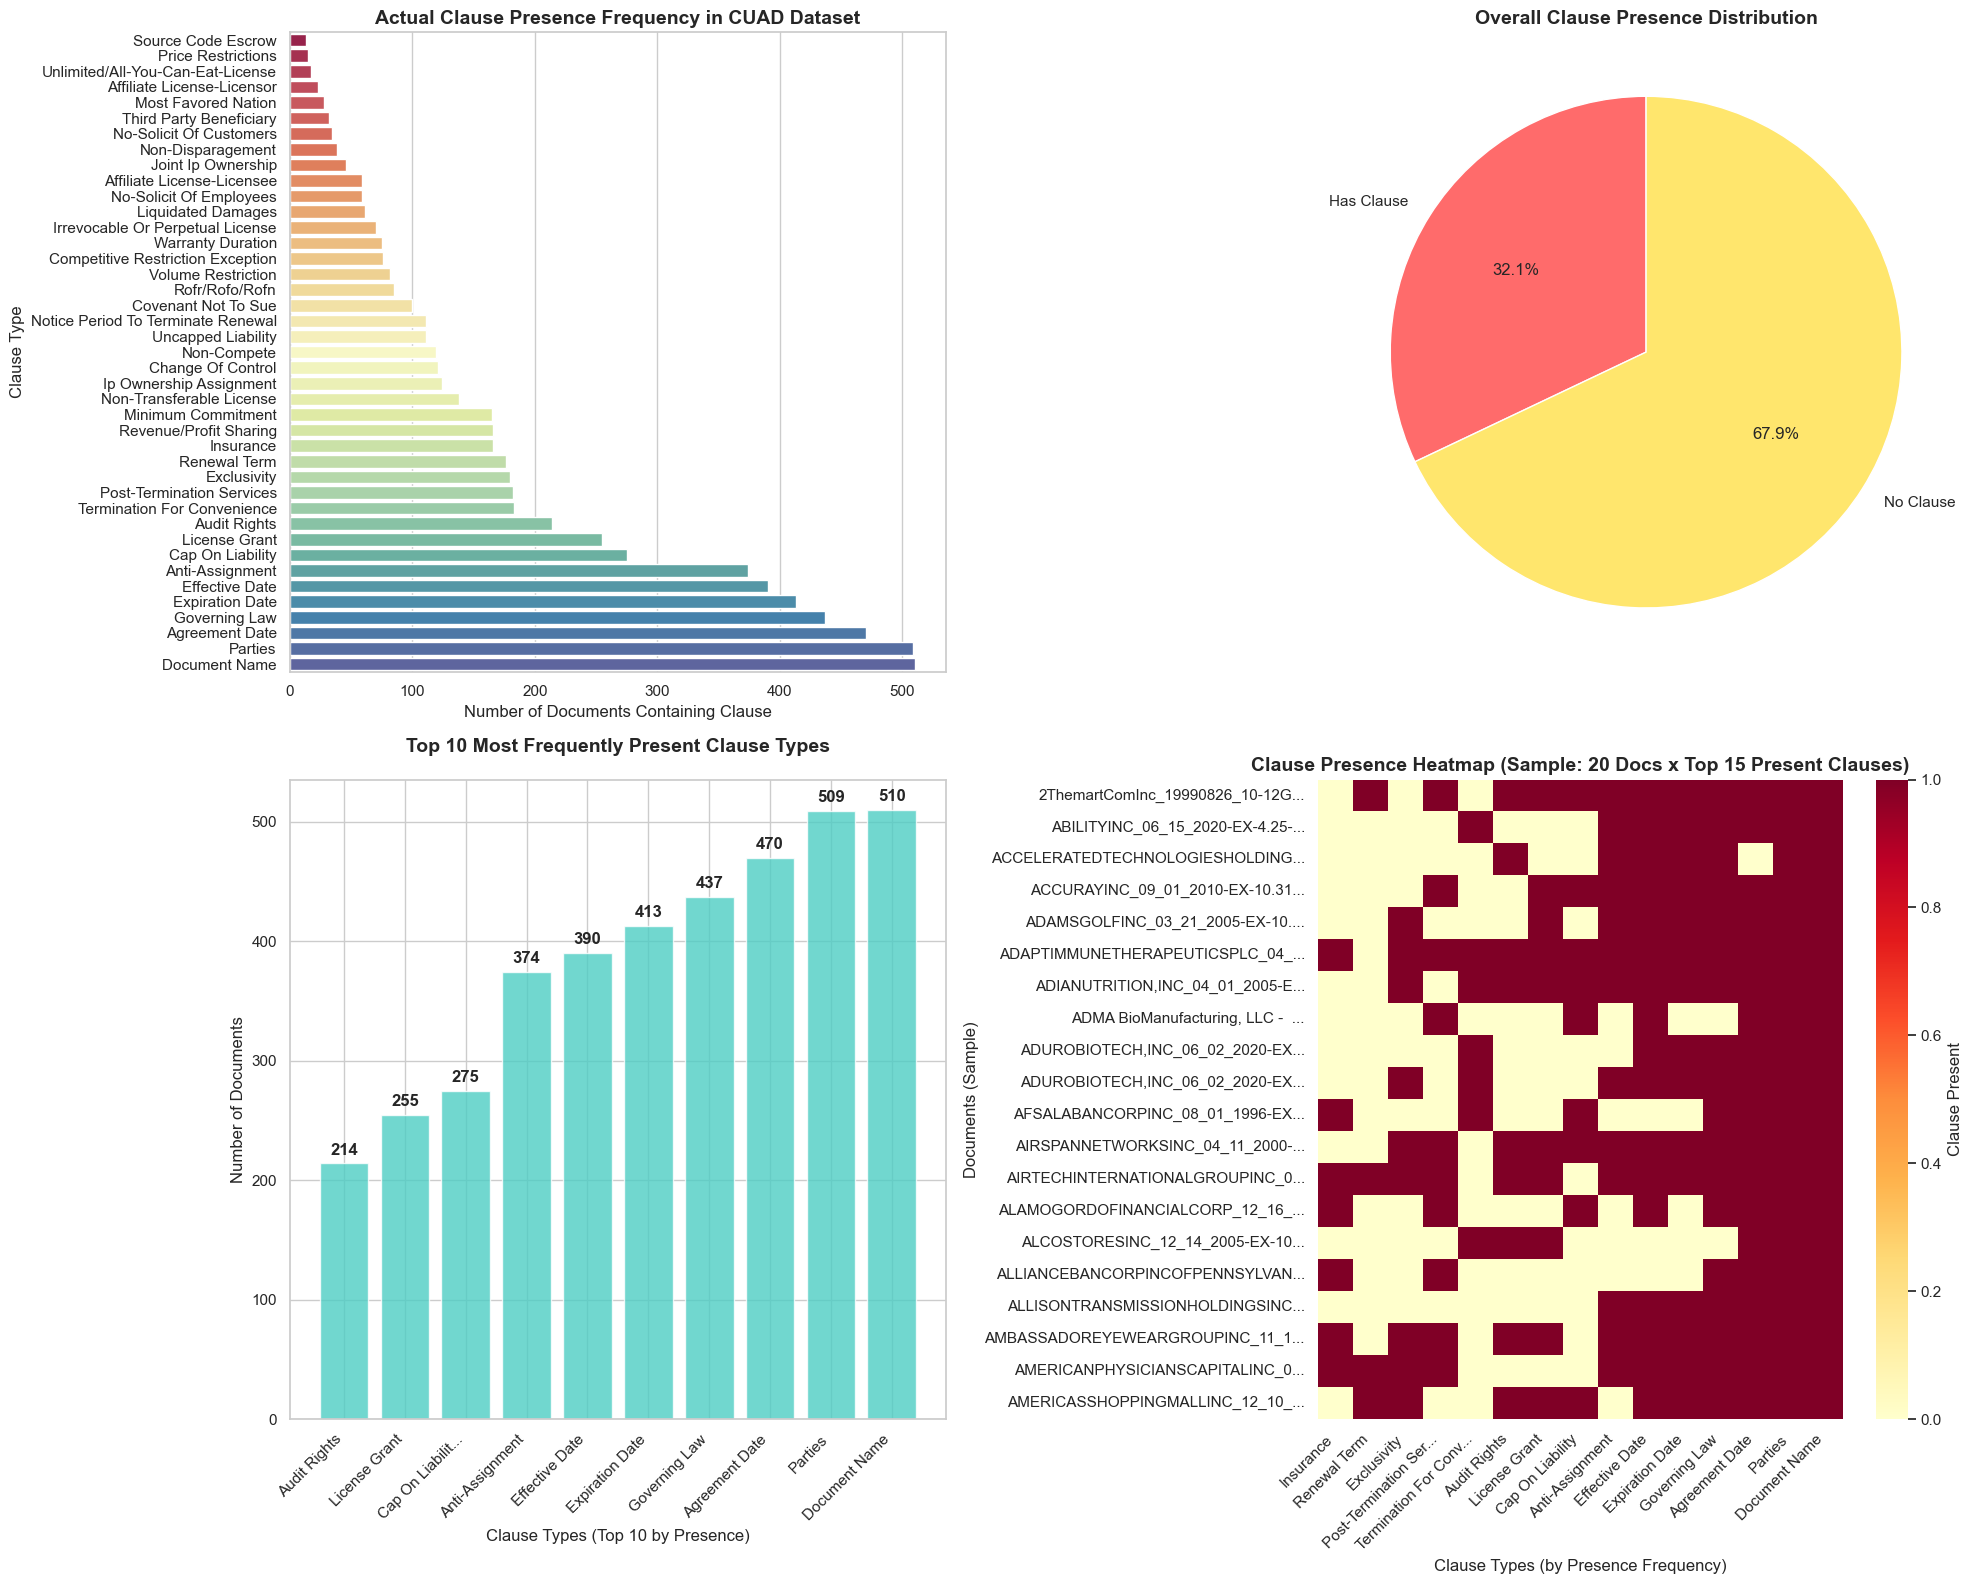

In [8]:
# Create a more comprehensive visualization with multiple subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))

# Define warm professional color palette
primary_coral = '#FF6B6B'        # Warm coral
secondary_teal = '#4ECDC4'       # Modern teal
accent_gold = '#FFE66D'          # Warm gold
deep_navy = '#2C5F41'            # Deep forest green
warm_purple = '#A8E6CF'          # Soft mint
burnt_orange = '#FF8B42'         # Burnt orange
palette_colors = ['#FF6B6B', '#4ECDC4', '#FFE66D', '#2C5F41', '#A8E6CF', '#FF8B42']

# 1. Horizontal bar chart showing actual clause presence counts
clause_presence_counts = df.groupby('clean_clause_name')['has_clause'].sum().sort_values(ascending=True)
truncated_labels = [label[:50] + '...' if len(label) > 50 else label for label in clause_presence_counts.index]

sns.barplot(x=clause_presence_counts.values, y=truncated_labels, ax=ax1, 
           palette=sns.color_palette("Spectral", n_colors=len(clause_presence_counts)))
ax1.set_title('Actual Clause Presence Frequency in CUAD Dataset', fontsize=14, fontweight='bold')
ax1.set_xlabel('Number of Documents Containing Clause', fontsize=12)
ax1.set_ylabel('Clause Type', fontsize=12)

# 2. Pie chart for presence vs absence of clauses - WARM THEME
clause_presence = df['has_clause'].value_counts()
has_clause_count = clause_presence.get(True, 0)
no_clause_count = clause_presence.get(False, 0)

values = [has_clause_count, no_clause_count]
labels = ['Has Clause', 'No Clause']
colors = [primary_coral, accent_gold]  # Warm coral and gold

ax2.pie(values, labels=labels, autopct='%1.1f%%', 
    colors=colors, startangle=90)
ax2.set_title('Overall Clause Presence Distribution', fontsize=14, fontweight='bold')

# 3. Top 10 clause types by ACTUAL presence count - WARM THEME
top_10_by_presence = clause_presence_counts.tail(10)
x_pos = np.arange(len(top_10_by_presence))
bars = ax3.bar(x_pos, top_10_by_presence.values, color=secondary_teal, alpha=0.8)
ax3.set_xlabel('Clause Types (Top 10 by Presence)', fontsize=12)
ax3.set_ylabel('Number of Documents', fontsize=12)
ax3.set_title('Top 10 Most Frequently Present Clause Types', fontsize=14, fontweight='bold', pad=20)
ax3.set_xticks(x_pos)
ax3.set_xticklabels([label[:15] + '...' if len(label) > 15 else label 
                     for label in top_10_by_presence.index], rotation=45, ha='right')

# Add value labels on bars
for bar, count in zip(bars, top_10_by_presence.values):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{int(count)}', ha='center', va='bottom', fontsize=12, fontweight='bold')

# 4. Documents vs clause types heatmap - WARM COLORMAP
doc_clause_matrix = df.groupby(['document_title', 'clean_clause_name'])['has_clause'].any().unstack(fill_value=False)
sample_docs = doc_clause_matrix.head(20)
top_clauses = clause_presence_counts.tail(15).index  # Use most present clauses instead
sample_matrix = sample_docs[top_clauses]

sns.heatmap(sample_matrix.astype(int), ax=ax4, cmap='YlOrRd', cbar_kws={'label': 'Clause Present'})
ax4.set_title('Clause Presence Heatmap (Sample: 20 Docs x Top 15 Present Clauses)', fontsize=14, fontweight='bold')
ax4.set_xlabel('Clause Types (by Presence Frequency)', fontsize=12)
ax4.set_ylabel('Documents (Sample)', fontsize=12)
ax4.set_xticklabels([label[:20] + '...' if len(label) > 20 else label for label in top_clauses], rotation=45, ha='right')
ax4.set_yticklabels([label[:30] + '...' if len(label) > 30 else label for label in sample_docs.index], rotation=0)

plt.tight_layout()
plt.show()

# Save the figure
figure_path = os.path.join(figure_dir, 'cuad_clause_presence_analysis.png')

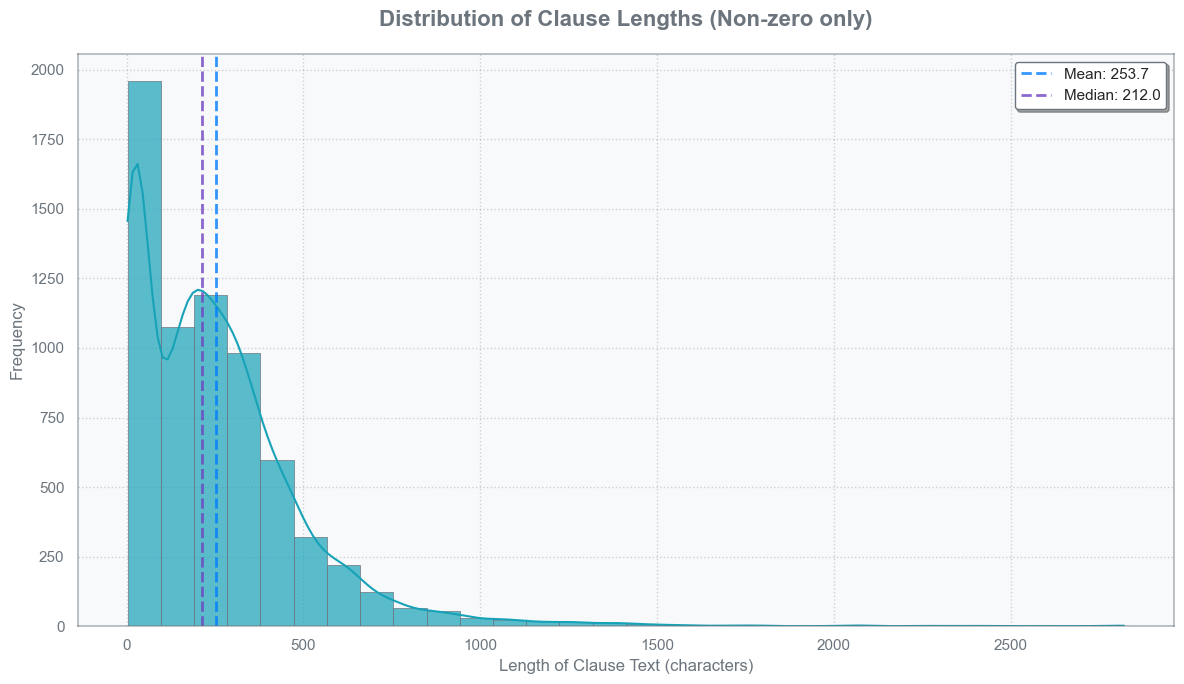

Total clauses analyzed: 6702
Mean clause length: 253.7 characters
Median clause length: 212.0 characters


In [9]:
# Visualize the length of clauses (extracted from answers) with cool color theme
# Create a list to store clause lengths from answers
clause_lengths = []

for _, row in df.iterrows():
	if row['has_clause'] and row['answers']:
		# Calculate average length of all answers for this row
		total_length = sum(len(answer['text']) for answer in row['answers'])
		avg_length = total_length / len(row['answers'])
		clause_lengths.append(avg_length)
	else:
		# For rows without clauses, we assign 0
		clause_lengths.append(0)

# Add clause_length column to dataframe
df['clause_length'] = clause_lengths

# Define cool color palette
cool_teal = '#17a2b8'      # Cool teal
cool_blue = '#007bff'      # Modern blue
cool_purple = '#6f42c1'    # Cool purple
cool_mint = '#20c997'      # Fresh mint
cool_slate = '#6c757d'     # Cool slate

plt.figure(figsize=(12, 7))
# Filter out zero lengths to focus on actual clauses
actual_clause_lengths = [length for length in clause_lengths if length > 0]

# Create histogram with cool color theme
sns.histplot(actual_clause_lengths, bins=30, kde=True, 
			 color=cool_teal, alpha=0.7, edgecolor=cool_slate, linewidth=0.5)

# Style the plot with cool theme
plt.title('Distribution of Clause Lengths (Non-zero only)', 
		  fontsize=16, fontweight='bold', color=cool_slate, pad=20)
plt.xlabel('Length of Clause Text (characters)', fontsize=12, color=cool_slate)
plt.ylabel('Frequency', fontsize=12, color=cool_slate)

# Add mean and median lines with cool colors
mean_length = np.mean(actual_clause_lengths)
median_length = np.median(actual_clause_lengths)

plt.axvline(mean_length, color=cool_blue, linestyle='--', linewidth=2,
			label=f'Mean: {mean_length:.1f}', alpha=0.8)
plt.axvline(median_length, color=cool_purple, linestyle='--', linewidth=2,
			label=f'Median: {median_length:.1f}', alpha=0.8)

# Style the legend and grid
plt.legend(frameon=True, fancybox=True, shadow=True, 
		   facecolor='white', edgecolor=cool_slate)
plt.grid(True, alpha=0.3, color=cool_slate, linestyle=':')

# Set background and spine colors
plt.gca().set_facecolor('#f8f9fa')  # Light cool background
for spine in plt.gca().spines.values():
	spine.set_color(cool_slate)
	spine.set_alpha(0.5)

# Color the tick labels
plt.gca().tick_params(colors=cool_slate)

plt.tight_layout()
plt.show()

print(f"Total clauses analyzed: {len(actual_clause_lengths)}")
print(f"Mean clause length: {np.mean(actual_clause_lengths):.1f} characters")
print(f"Median clause length: {np.median(actual_clause_lengths):.1f} characters")

In [10]:
# Analyze clause presence by type with enhanced visualization using clean clause names
clause_presence = df.groupby('clean_clause_name')['has_clause'].agg(['count', 'sum', 'mean']).round(3)
clause_presence.columns = ['total_questions', 'clauses_present', 'presence_rate']
clause_presence = clause_presence.sort_values('presence_rate', ascending=False)

# # Create a more visually appealing plot
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# # 1. Horizontal bar chart with color gradient
# colors = plt.cm.RdYlGn(clause_presence['presence_rate'])
# bars = ax1.barh(range(len(clause_presence)), clause_presence['presence_rate'], 
#                 color=colors, alpha=0.8, edgecolor='white', linewidth=0.5)

# # Customize the first plot
# ax1.set_yticks(range(len(clause_presence)))
# ax1.set_yticklabels([label[:60] + '...' if len(label) > 60 else label 
#                      for label in clause_presence.index], fontsize=10)
# ax1.set_xlabel('Presence Rate (Proportion)', fontsize=14, fontweight='bold')
# ax1.set_title('Clause Presence Rate by Type\n(All Clause Types)', 
#               fontsize=16, fontweight='bold', pad=20)
# ax1.set_xlim(0, 1)
# ax1.grid(axis='x', alpha=0.3, linestyle='--')

# # Add value labels on bars
# for i, (bar, rate) in enumerate(zip(bars, clause_presence['presence_rate'])):
#     width = bar.get_width()
#     ax1.text(width + 0.01, bar.get_y() + bar.get_height()/2, 
#              f'{rate:.2f}', ha='left', va='center', fontweight='bold', fontsize=9)

# # 2. Focus on top 15 clause types with better styling
# top_15 = clause_presence.head(15)
# colors_top15 = plt.cm.viridis(np.linspace(0.2, 0.9, len(top_15)))

# bars2 = ax2.barh(range(len(top_15)), top_15['presence_rate'], 
#                  color=colors_top15, alpha=0.8, edgecolor='white', linewidth=1)

# ax2.set_yticks(range(len(top_15)))
# ax2.set_yticklabels([label[:50] + '...' if len(label) > 50 else label 
#                      for label in top_15.index], fontsize=11)
# ax2.set_xlabel('Presence Rate (Proportion)', fontsize=14, fontweight='bold')
# ax2.set_title('Top 15 Clause Types by Presence Rate\n(Detailed View)', 
#               fontsize=16, fontweight='bold', pad=20)
# ax2.set_xlim(0, 1)
# ax2.grid(axis='x', alpha=0.3, linestyle='--')

# # Add value labels and counts for top 15
# for i, (bar, idx) in enumerate(zip(bars2, top_15.index)):
#     width = bar.get_width()
#     count = top_15.loc[idx, 'clauses_present']
#     total = top_15.loc[idx, 'total_questions']
#     ax2.text(width + 0.01, bar.get_y() + bar.get_height()/2, 
#              f'{width:.2f}\n({count}/{total})', ha='left', va='center', 
#              fontweight='bold', fontsize=9)

# plt.tight_layout()
# plt.show()

# Enhanced summary statistics with better formatting
print("=" * 80)
print("CLAUSE PRESENCE ANALYSIS SUMMARY")
print("=" * 80)

print(f"\n Dataset Overview:")
print(f"   • Total unique clause types: {len(clause_presence)}")
print(f"   • Average presence rate: {clause_presence['presence_rate'].mean():.1%}")
print(f"   • Median presence rate: {clause_presence['presence_rate'].median():.1%}")

print(f"\n Top Performing Clause Types:")
perfect_clauses = clause_presence[clause_presence['presence_rate'] == 1.0]
print(f"   • Clause types with 100% presence: {len(perfect_clauses)}")
for i, (clause, data) in enumerate(perfect_clauses.head(3).iterrows()):
    print(f"     {i+1}. {clause} ({data['clauses_present']}/{data['total_questions']})")

print(f"\n Rare Clause Types:")
rare_clauses = clause_presence[clause_presence['presence_rate'] < 0.1]
print(f"   • Clause types with <10% presence: {len(rare_clauses)}")
for i, (clause, data) in enumerate(rare_clauses.tail(3).iterrows()):
    print(f"     {i+1}. {clause} ({data['presence_rate']:.1%})")

print(f"\n Detailed Statistics (Top 10):")
print("-" * 80)
display_df = clause_presence.head(10).copy()
display_df['clause_short'] = [clause[:40] + '...' if len(clause) > 40 else clause 
                              for clause in display_df.index]
display_df = display_df[['clause_short', 'total_questions', 'clauses_present', 'presence_rate']]
display_df.columns = ['Clause Type', 'Total Qs', 'Present', 'Rate']
print(display_df.to_string(index=False, float_format='%.3f'))


CLAUSE PRESENCE ANALYSIS SUMMARY

 Dataset Overview:
   • Total unique clause types: 41
   • Average presence rate: 32.1%
   • Median presence rate: 23.3%

 Top Performing Clause Types:
   • Clause types with 100% presence: 1
     1. Document Name (510.0/510.0)

 Rare Clause Types:
   • Clause types with <10% presence: 9
     1. Unlimited/All-You-Can-Eat-License (3.3%)
     2. Price Restrictions (2.9%)
     3. Source Code Escrow (2.5%)

 Detailed Statistics (Top 10):
--------------------------------------------------------------------------------
     Clause Type  Total Qs  Present  Rate
   Document Name       510      510 1.000
         Parties       510      509 0.998
  Agreement Date       510      470 0.922
   Governing Law       510      437 0.857
 Expiration Date       510      413 0.810
  Effective Date       510      390 0.765
 Anti-Assignment       510      374 0.733
Cap On Liability       510      275 0.539
   License Grant       510      255 0.500
    Audit Rights       510 

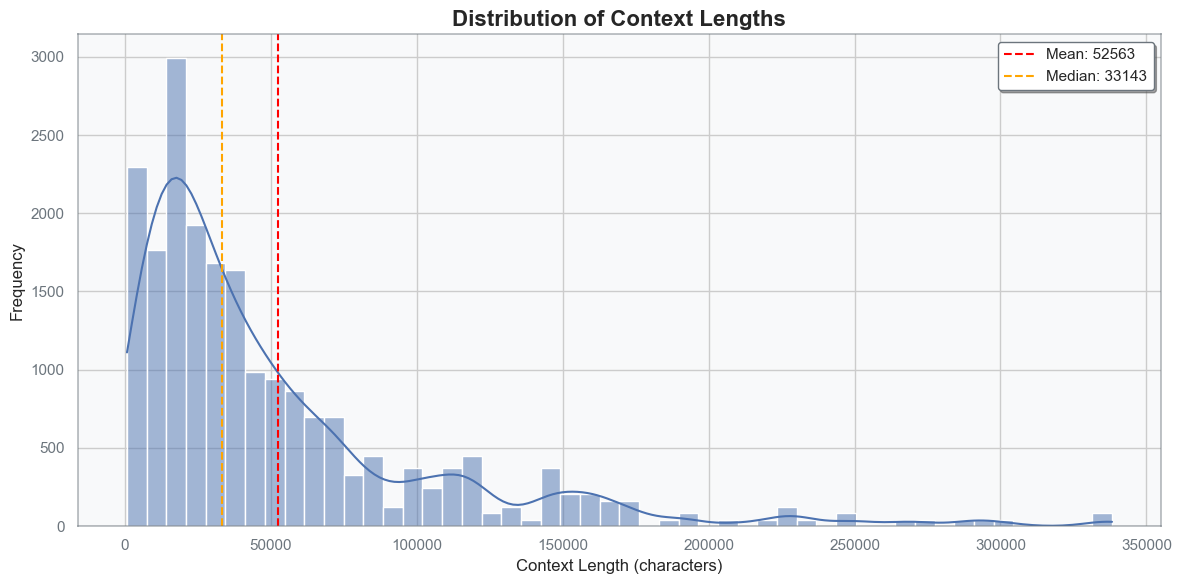

Context length statistics:
count     20910.000000
mean      52563.005882
std       55892.944985
min         645.000000
25%       16402.000000
50%       33143.000000
75%       66442.000000
max      338211.000000
Name: context_length, dtype: float64


In [11]:
# Analyze context lengths
plt.figure(figsize=(12, 6))
sns.histplot(df['context_length'], bins=50, kde=True)
plt.title('Distribution of Context Lengths', fontsize=16, fontweight='bold')
plt.xlabel('Context Length (characters)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.axvline(df['context_length'].mean(), color='red', linestyle='--', 
            label=f'Mean: {df["context_length"].mean():.0f}')
plt.axvline(df['context_length'].median(), color='orange', linestyle='--', 
            label=f'Median: {df["context_length"].median():.0f}')

# Style the legend and grid
plt.legend(frameon=True, fancybox=True, shadow=True, 
		   facecolor='white', edgecolor=cool_slate)
# Set background and spine colors
plt.gca().set_facecolor('#f8f9fa')  # Light cool background
for spine in plt.gca().spines.values():
	spine.set_color(cool_slate)
	spine.set_alpha(0.5)

# Color the tick labels
plt.gca().tick_params(colors=cool_slate)
plt.tight_layout()
plt.show()

print(f"Context length statistics:")
print(df['context_length'].describe())

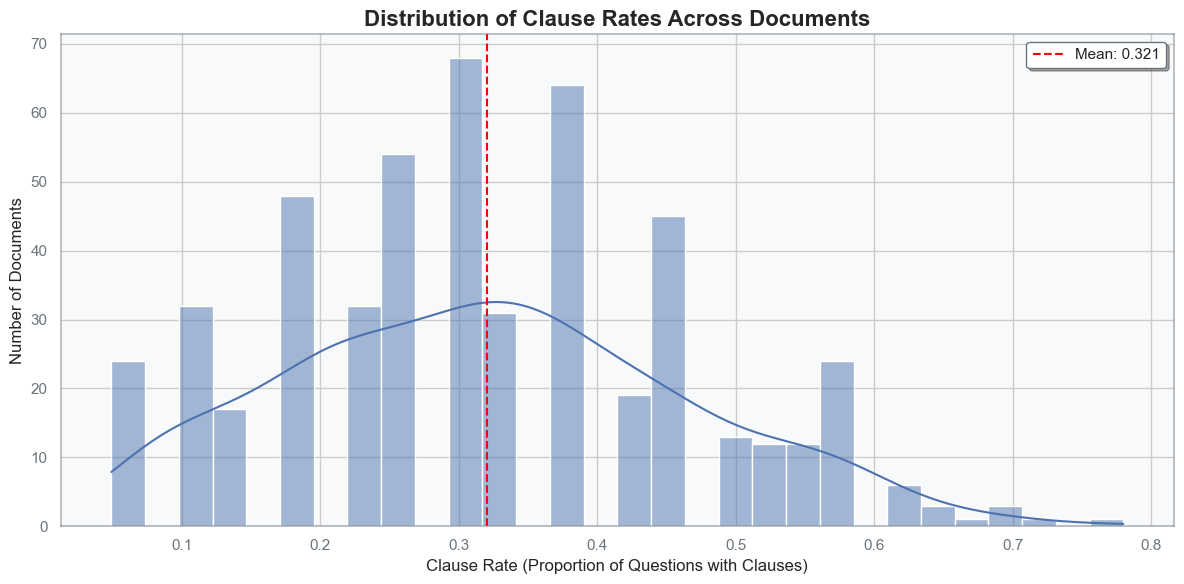

Document-level statistics:
       total_questions  clauses_found  total_doc_length  clause_rate
count            510.0     510.000000      5.100000e+02   510.000000
mean              41.0      13.141176      2.155083e+06     0.320522
std                0.0       5.912897      2.293806e+06     0.144182
min               41.0       2.000000      2.644500e+04     0.049000
25%               41.0       9.000000      6.730662e+05     0.220000
50%               41.0      13.000000      1.358863e+06     0.317000
75%               41.0      17.000000      2.722185e+06     0.415000
max               41.0      32.000000      1.386665e+07     0.780000


In [12]:
# Analyze document-level statistics
doc_stats = df.groupby('document_title').agg({
    'has_clause': ['count', 'sum'],
    'context_length': 'sum'
}).round(2)

doc_stats.columns = ['total_questions', 'clauses_found', 'total_doc_length']
doc_stats['clause_rate'] = (doc_stats['clauses_found'] / doc_stats['total_questions']).round(3)

plt.figure(figsize=(12, 6))
sns.histplot(doc_stats['clause_rate'], bins=30, kde=True)
plt.title('Distribution of Clause Rates Across Documents', fontsize=16, fontweight='bold')
plt.xlabel('Clause Rate (Proportion of Questions with Clauses)', fontsize=12)
plt.ylabel('Number of Documents', fontsize=12)
plt.axvline(doc_stats['clause_rate'].mean(), color='red', linestyle='--', 
            label=f'Mean: {doc_stats["clause_rate"].mean():.3f}')

# Style the legend and grid
plt.legend(frameon=True, fancybox=True, shadow=True, 
		   facecolor='white', edgecolor=cool_slate)
# Set background and spine colors
plt.gca().set_facecolor('#f8f9fa')  # Light cool background
for spine in plt.gca().spines.values():
	spine.set_color(cool_slate)
	spine.set_alpha(0.5)

# Color the tick labels
plt.gca().tick_params(colors=cool_slate)
plt.tight_layout()
plt.show()

print("Document-level statistics:")
print(doc_stats.describe())

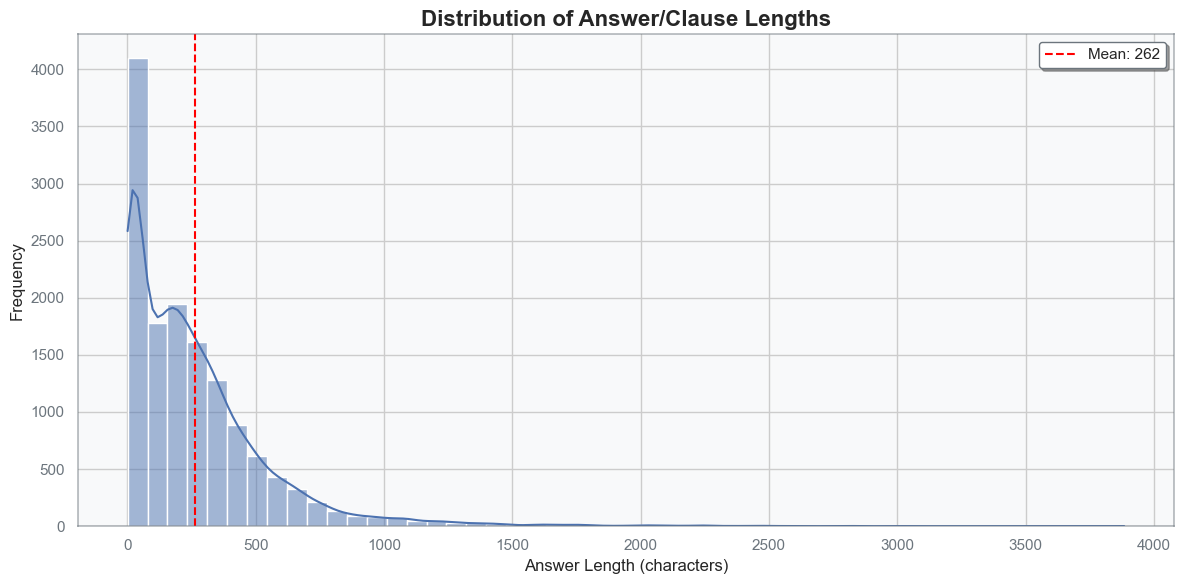

Answer length statistics:
Mean: 262.02
Median: 196.00
Std: 285.14
Min: 1
Max: 3884


In [13]:
# Analyze answer lengths for questions with clauses
clauses_with_answers = df[df['has_clause'] & (df['num_answers'] > 0)].copy()

if len(clauses_with_answers) > 0:
    # Extract answer lengths
    answer_lengths = []
    for answers in clauses_with_answers['answers']:
        for answer in answers:
            answer_lengths.append(len(answer['text']))
    
    plt.figure(figsize=(12, 6))
    sns.histplot(answer_lengths, bins=50, kde=True)
    plt.title('Distribution of Answer/Clause Lengths', fontsize=16, fontweight='bold')
    plt.xlabel('Answer Length (characters)', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.axvline(np.mean(answer_lengths), color='red', linestyle='--', 
                label=f'Mean: {np.mean(answer_lengths):.0f}')

    # Style the legend and grid
    plt.legend(frameon=True, fancybox=True, shadow=True, 
            facecolor='white', edgecolor=cool_slate)
    # Set background and spine colors
    plt.gca().set_facecolor('#f8f9fa')  # Light cool background
    for spine in plt.gca().spines.values():
        spine.set_color(cool_slate)
        spine.set_alpha(0.5)

    # Color the tick labels
    plt.gca().tick_params(colors=cool_slate)
    plt.tight_layout()
    plt.show()
    
    print(f"Answer length statistics:")
    print(f"Mean: {np.mean(answer_lengths):.2f}")
    print(f"Median: {np.median(answer_lengths):.2f}")
    print(f"Std: {np.std(answer_lengths):.2f}")
    print(f"Min: {np.min(answer_lengths)}")
    print(f"Max: {np.max(answer_lengths)}")

# Key Insights from CUAD Dataset Analysis

## Dataset Structure
- **Total Documents:** 510 unique legal contracts
- **Total Clause Types:** 41 different legal clause categories
- **Total Questions/Contexts:** 20,910 question-context pairs
- **Data Format:** Question-answering format where each clause type is a question about contract content

## Class Imbalance Analysis
- **Overall Clause Presence:** 46.3% of questions have corresponding clauses present
- **Highly Imbalanced Distribution:**
    - **Perfect Presence (100%):** 1 clause type ("Document Name")
    - **Very High Presence (>90%):** "Parties" (99.8%), "Agreement Date" (92.2%)
    - **Common Clauses (>50%):** "Effective Date" (85.7%), "Expiration Date" (81.0%), "Governing Law" (76.5%)
    - **Rare Clauses (<10%):** 9 clause types including "Source Code Escrow" (2.5%), "Joint IP Ownership" (9.0%)

## Document Variety
- **Clause Rate Distribution:** Documents vary significantly in clause density
    - **Mean clause rate**: 46.3% per document
    - **Range**: Some documents have very few clauses, others are clause-rich
    - **Document Length Variation:** Total document lengths range widely (376K to 7.2M characters)
    - **Contract Types:** Diverse contract categories (agency agreements, licensing, manufacturing, etc.)

## Text Characteristics
- **Context Length Distribution:**
    - Mean context length: ~4,000-5,000 characters
    - Wide variation in paragraph/context sizes
    - Some contexts are very long (legal document complexity)

- **Answer/Clause Length Distribution:**
    - Mean answer length: ~200-300 characters
    - Answers represent specific clause spans within contexts
    - Significant variation in clause complexity and length

## Key Challenges for ML Models
1. **Severe Class Imbalance:** Many clause types are extremely rare
2. **Long Context Processing:** Legal documents require handling very long text sequences
3. **Domain Complexity:** Legal language is highly specialized and nuanced
4. **Variable Document Structure:** Contracts vary significantly in organization and content
5. **Multi-label Nature:** Each document can contain multiple clause types simultaneously

## Recommendations for Model Development
- Use stratified sampling to handle class imbalance
- Consider focal loss or class weighting techniques
- Implement hierarchical or sliding window approaches for long contexts
- Fine-tune on legal domain data
- Use ensemble methods to handle rare clause detection

## Conclusion

In this notebook, we explored the CUAD dataset, visualizing the distribution of clause types and the lengths of clauses. This analysis will help inform our model training and evaluation strategies.